<h1 style="color: blue; text-align:center;">LINEAR REGRESSION</h1>

<h3>1. Importing Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h3>2. Reading the data</h3>

In [2]:
data = pd.read_csv("data/FuelConsumption.csv")
data.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

<h3>3. Analyzing the data</h3>

In [3]:
data.shape

(1067, 13)

In [4]:
data.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
data.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

<h3>4. Cleaning the data</h3>

In [7]:
data = data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
data = data.rename(columns={
                'ENGINESIZE':'ENGINE SIZE', 
                'FUELCONSUMPTION_COMB': 'FUEL CONSUMPTION', 
                'CO2EMISSIONS': 'CO2 EMISSIONS'})
data.head()

ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  CO2 EMISSIONS
0          2.0          4               8.5            196
1          2.4          4               9.6            221
2          1.5          4               5.9            136
3          3.5          6              11.1            255
4          3.5          6              10.6            244

In [8]:
data.corr()

ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  CO2 EMISSIONS
ENGINE SIZE          1.000000   0.934011          0.819482       0.874154
CYLINDERS            0.934011   1.000000          0.776788       0.849685
FUEL CONSUMPTION     0.819482   0.776788          1.000000       0.892129
CO2 EMISSIONS        0.874154   0.849685          0.892129       1.000000

<h3>5. Checking relation between data</h3>

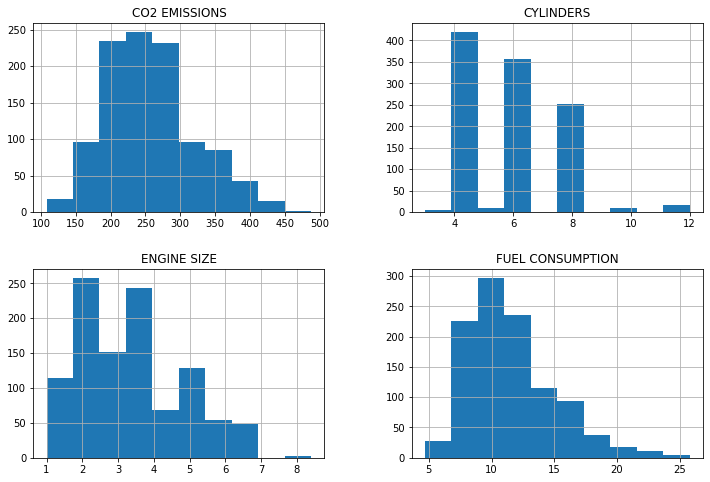

In [9]:
data[['CYLINDERS','ENGINE SIZE','CO2 EMISSIONS','FUEL CONSUMPTION']].hist(figsize=(12, 8))
plt.show()

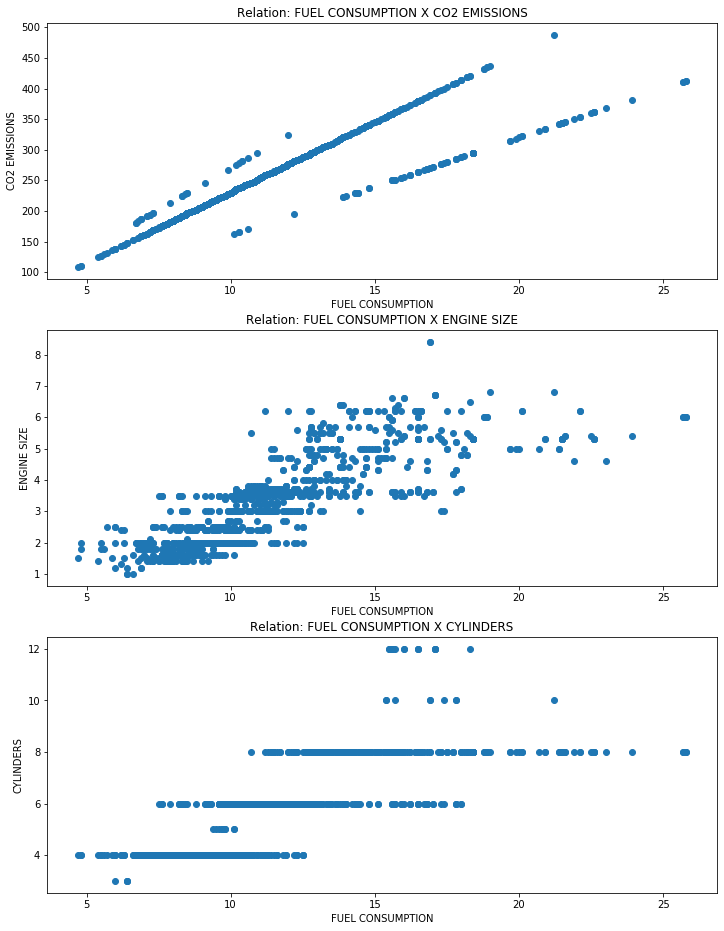

In [10]:
fig, axs = plt.subplots(3, figsize=(12,16))

axs[0].scatter(data['FUEL CONSUMPTION'], data['CO2 EMISSIONS'])
axs[0].set_title("Relation: FUEL CONSUMPTION X CO2 EMISSIONS")
axs[0].set_xlabel("FUEL CONSUMPTION")
axs[0].set_ylabel("CO2 EMISSIONS")

axs[1].scatter(data['FUEL CONSUMPTION'], data['ENGINE SIZE'])
axs[1].set_title("Relation: FUEL CONSUMPTION X ENGINE SIZE")
axs[1].set_xlabel("FUEL CONSUMPTION")
axs[1].set_ylabel("ENGINE SIZE")

axs[2].scatter(data['FUEL CONSUMPTION'], data['CYLINDERS'])
axs[2].set_title("Relation: FUEL CONSUMPTION X CYLINDERS")
axs[2].set_xlabel("FUEL CONSUMPTION")
axs[2].set_ylabel("CYLINDERS")

plt.show()

<h3>6. Splitting the data</h3>

In [11]:
X = data[['ENGINE SIZE', 'CYLINDERS', 'CO2 EMISSIONS']].values
X

array([[  2. ,   4. , 196. ],
       [  2.4,   4. , 221. ],
       [  1.5,   4. , 136. ],
       ...,
       [  3. ,   6. , 271. ],
       [  3.2,   6. , 260. ],
       [  3.2,   6. , 294. ]])

In [12]:
y = data['FUEL CONSUMPTION'].values
y

array([ 8.5,  9.6,  5.9, ..., 11.8, 11.3, 12.8])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.20, random_state=15)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(853, 3)
(214, 3)
(853,)
(214,)


<h3>7. Creating the Model</h3>

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<h3>8. Making Prediction</h3>

In [16]:
y_pred = model.predict(X_test)   
y_pred

array([12.51643506, 15.9077482 ,  9.23440658,  8.06768777,  7.55563453,
       17.01711336, 12.19589776,  9.11969927,  8.73966367, 19.48256862,
        7.77833349, 16.21226818, 10.06113311,  7.57165186, 11.64165655,
       11.51764757,  6.45557104,  7.12625394, 12.05501982, 16.10771418,
        9.02901796, 13.26048894,  7.54633286, 13.88311985,  8.06768777,
       13.65241222, 13.1297643 , 13.28624931,  9.1103976 , 14.25514678,
       11.60832889,  8.36634373, 14.99163337, 16.61434477, 12.04701115,
        6.47158837, 10.87228368, 14.31423482, 17.01711336, 18.26779783,
        8.57302536, 12.84841868,  8.30142278, 14.24757949, 14.08980148,
       11.84833818,  8.73837066, 14.91826238, 10.5335844 , 14.31965747,
        6.89425331, 11.88967451,  9.23440658,  9.53306254, 16.07309351,
       18.35047048, 11.07095665, 16.85176805,  7.84498881,  6.97692596,
       11.80700186, 17.71440826, 11.75765687, 11.79725882, 10.47449637,
        7.04358128, 12.78434937, 11.15233629,  9.89493617, 16.00

In [17]:
data_predicted = pd.DataFrame({'ACTUAL': y_test, 'PREDICTED': np.around(y_pred, decimals=1)})
data_predicted

ACTUAL  PREDICTED
0      10.6       12.5
1      15.2       15.9
2       9.2        9.2
3       8.3        8.1
4       7.6        7.6
..      ...        ...
209    12.3       12.8
210    18.9       20.4
211    10.9       12.8
212    15.7       11.5
213     7.2        7.2

[214 rows x 2 columns]

<h3>9. Showing Results</h3>

In [18]:
model.score(X_test, y_test)

0.8029827847781741

In [19]:
y_test_round = np.around(y_test, 0)
y_pred_round = np.around(y_pred, 0)

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_round, y_pred_round)

0.48130841121495327

In [21]:
from sklearn.model_selection import cross_val_score

scores_train = cross_val_score(model, X_train, y_train, cv=10)
scores_train

array([0.85024343, 0.74122057, 0.82821699, 0.81655395, 0.79912549,
       0.82998595, 0.79477769, 0.85933934, 0.7907554 , 0.73666693])

In [22]:
list(zip(['ENGINE SIZE', 'CYLINDERS', 'CO2 EMISSIONS'], model.coef_))

[('ENGINE SIZE', 0.7466398893584058),
 ('CYLINDERS', -0.2617497799418963),
 ('CO2 EMISSIONS', 0.041336326374819016)]

In [23]:
model.intercept_

0.024824730734401612

In [24]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8029827847781741

In [25]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_test)

2.461967018731658

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_round, y_pred_round)

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  2, 10,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  4, 20,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0, 17,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  1,  0,  2, 13,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 13, 11,  2,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 11,  8,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10, 12,  3,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  2,  5,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  6,  2,  0,  0,  0